<a href="https://colab.research.google.com/github/EbsHirani/CreditCardFraudDetector/blob/master/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
os.chdir("drive/My Drive/codeshastra/CreditCard/CreditCard/datasets/mlg-ulb/creditcardfraud")

In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
credit_card_data = pd.read_csv("creditcard.csv")


In [7]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Heatmap of correleation of features:


Text(0.5, 1.0, 'Heatmap of Correlation')

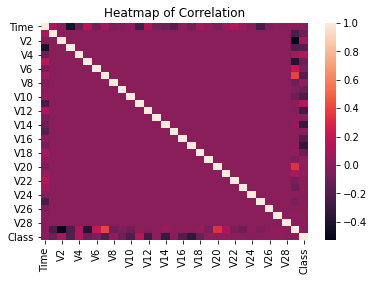

In [8]:
sns.heatmap(data = credit_card_data.corr())
plt.title("Heatmap of Correlation")

Count of Fraud vs Non-Fraud transcations:

Text(0.5, 1.0, 'Counts of non-fraud vs fraud transactions')

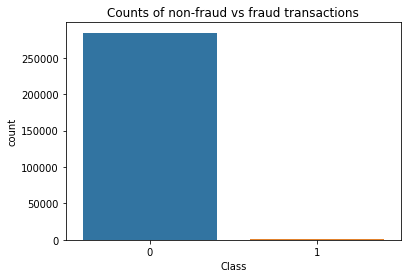

In [9]:
sns.countplot(x = "Class", data = credit_card_data)
plt.title("Counts of non-fraud vs fraud transactions")

KDE(Smoothened Histogram) plot of amount for genuine and fraud transactions:

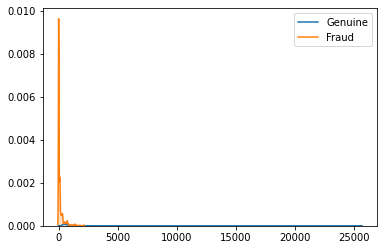

In [10]:
sns.kdeplot(data = credit_card_data[credit_card_data["Class"] == 0]["Amount"], label = "Genuine", shade = True)
sns.kdeplot(data = credit_card_data[credit_card_data["Class"] == 1]["Amount"], label = "Fraud", shade = True)
plt.legend()

Plotting Time against Amount to see difference in distribution between Genuine and Fraud transactions:

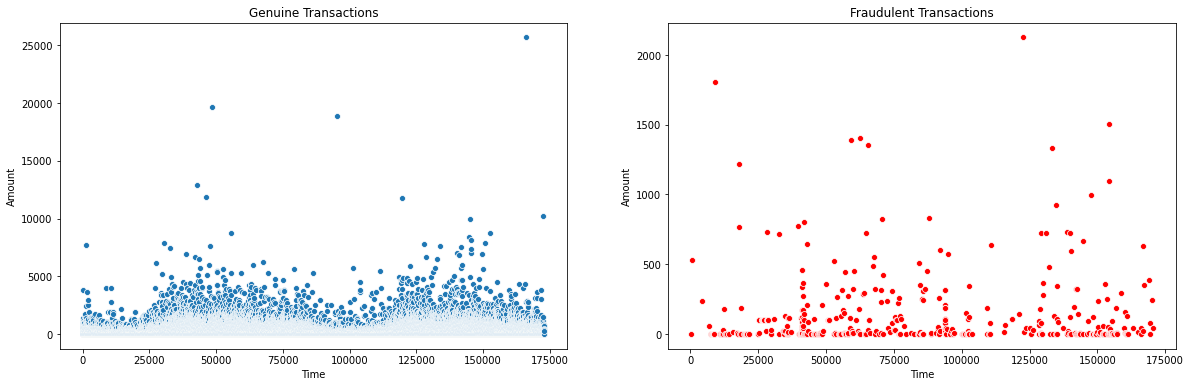

In [11]:
f, (ax1, ax2) = plt.subplots(1,2, figsize = (20, 6))
sns.scatterplot(x = "Time", y = "Amount",ax = ax1, data = credit_card_data[credit_card_data["Class"] == 0])
ax1.set_title("Genuine Transactions")
sns.scatterplot(x = "Time", y = "Amount", ax = ax2, data = credit_card_data[credit_card_data["Class"] == 1], color = "red")
ax2.set_title("Fraudulent Transactions")
plt.show()

Reducing number of genuine transactions as the number of genuine transactions are way more than fraud transactions. If we don't reduce, our classifier will always classify as genuine for every transaction.

In [67]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
genuine = credit_card_data[credit_card_data["Class"] == 0]
fraud = credit_card_data[credit_card_data["Class"] == 1]
length = len(fraud.index)
genuine = genuine.sample(frac = 1, random_state = 42)
genuine = genuine.iloc[:length,:]
genuine.head()




,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,-0.597739,-0.325347,-0.216435,0.084204,-1.054631,0.967932,0.601226,0.631117,0.295078,-0.136151,-0.058040,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,0.170547,0.821998,0.468322,-0.057550,0.573006,0.358688,-0.011633,-0.504570,0.722750,0.861541,-0.081298,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,2.051312,0.575866,-0.594037,1.097880,-0.338340,0.617523,-0.756390,0.535141,1.016704,2.133828,0.065716,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,-1.238598,-0.841133,-0.586472,-0.779620,-0.436671,0.747871,0.266437,0.703234,0.916719,-0.189967,-0.169706,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,1.166335,1.297531,-1.920966,1.885047,1.323225,-2.044482,1.317655,-0.441076,0.804104,-1.658339,-0.282777,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0


Text(0.5, 1.0, 'Counts of non-fraud vs fraud transactions')

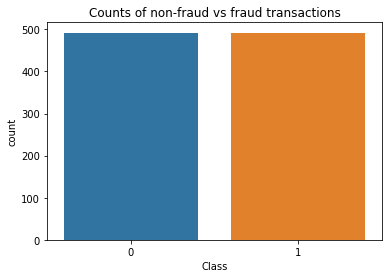

In [68]:
final_df = pd.concat([fraud,genuine]).sample(frac = 1, random_state = 42)
sns.countplot(x = "Class", data = final_df)
plt.title("Counts of non-fraud vs fraud transactions")

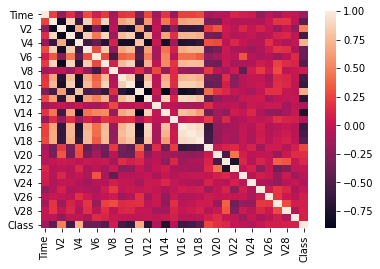

In [69]:
sns.heatmap(data = final_df.corr())

Visualizing distribution for time and amount.

Text(0.5, 1.0, 'Amount KDE')

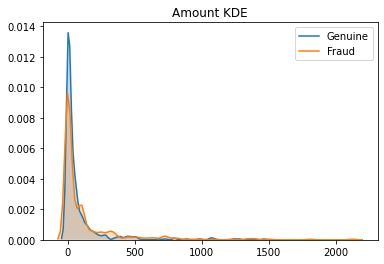

In [70]:
sns.kdeplot(data = final_df[final_df["Class"] == 0]["Amount"], label = "Genuine", shade = True)
sns.kdeplot(data = final_df[final_df["Class"] == 1]["Amount"], label = "Fraud", shade = True)
plt.legend()
plt.title("Amount KDE")

Text(0.5, 1.0, 'Time KDE')

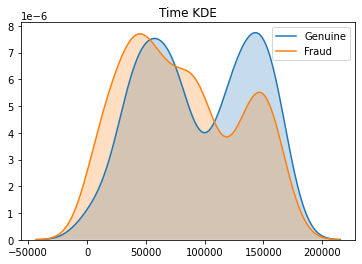

In [71]:
sns.kdeplot(data = final_df[final_df["Class"] == 0]["Time"], label = "Genuine", shade = True)
sns.kdeplot(data = final_df[final_df["Class"] == 1]["Time"], label = "Fraud", shade = True)
plt.legend()
plt.title("Time KDE")

In [72]:
final_df[["Time","Class"]].head()

,Time,Class
255545,157278.0,0
248296,153875.0,1
76163,56424.0,0
239501,150139.0,1
143336,85285.0,1


In [73]:
y_df = final_df["Class"]
x_df = final_df.drop(columns = ["Class"])
x_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
255545,157278.0,1.984787,-1.937036,0.486613,-1.245536,-2.518536,-0.544524,-1.819244,-0.074875,-0.659777,1.407038,-0.494081,0.078141,1.933232,-1.231701,0.336300,-0.007638,0.229932,0.391021,-0.791486,-0.127858,0.174011,0.889289,0.218248,0.492384,-0.584599,-0.135040,0.070319,-0.000205,120.00
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,-4.230984,4.436319,-4.503801,-0.954361,-9.861372,-0.505329,0.269282,0.591319,1.795992,-1.085208,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00
76163,56424.0,0.319007,-1.072867,-0.216146,1.494709,-0.627063,-0.761867,0.941687,-0.430272,-0.267431,-0.245992,-0.172332,0.887635,1.364419,0.242646,0.839773,0.053425,-0.486721,-0.209113,-0.530747,0.914995,0.332521,-0.022461,-0.537691,0.452072,0.555495,-0.383543,-0.068520,0.106578,484.00
239501,150139.0,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,-0.448794,-2.562602,0.243483,-1.181669,0.004373,-2.302596,-4.446192,-1.710463,0.982729,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,6.348979,-8.681609,0.251179,-11.608002,-0.351569,-5.363566,-11.939092,-3.583603,0.897402,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92


Splitting Dataset:


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_df,y_df, test_size = 0.2, random_state = 42 )

Reducing Features V1, V2, V3.... as they are not understood and most of them have a high correlation with each other.

In [75]:
reduce_df = x_train[["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28"]]
reduce_test =  x_test[["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28"]]
reduce_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
150679,-12.833631,7.508790,-20.491952,7.465780,-11.575304,-5.140999,-14.020564,8.332120,-4.337713,-15.563791,7.610820,-15.592323,0.504789,-13.247889,-0.796526,-10.342328,-16.044524,-5.882136,1.573698,-1.378923,2.966842,0.615344,-0.766495,0.431261,-0.104975,-0.010091,-2.400811,-0.720557
157183,2.063423,-0.084832,-0.595908,0.247028,0.088872,0.079969,-0.529464,-0.106960,2.475820,-0.636222,-0.265922,-1.685104,3.019578,1.221443,0.301333,0.384456,-0.286309,0.425713,-0.063735,-0.159712,-0.310464,-0.488751,0.294093,-0.058378,-0.233223,-0.956389,0.033984,-0.031238
74507,-7.427924,2.948209,-8.678550,5.185303,-4.761090,-0.957095,-7.773380,0.717309,-3.682359,-8.403150,5.705206,-8.640746,-1.602925,-9.466139,0.137324,-7.303243,-12.448039,-4.332834,2.352030,-0.123085,-0.299847,0.610479,0.789023,-0.564512,0.201196,-0.111225,1.144599,0.102280
58761,1.243848,0.524526,-0.538884,1.209196,0.479538,-0.197429,0.049166,0.037792,0.128119,-0.552903,-0.668359,-0.818804,-0.883832,-0.994581,1.506849,0.624003,0.705794,0.524182,-0.731750,-0.171541,-0.051660,-0.084089,-0.192846,-0.917392,0.681953,-0.194419,0.045917,0.040136
53591,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,2.962599,-3.956045,-1.539232,-4.634631,-0.248403,-2.058551,-5.635494,-0.775271,-0.239310,0.253464,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426


Using Singular Value Decomposition to reduce dimensionality to 3. The variance shows that only the first columns has the highest weight.(I keep 4 more columns anyway.)

In [91]:
svd = TruncatedSVD(n_components=5)
reduced = svd.fit_transform(reduce_df)
reduced_test = svd.transform(reduce_test)
print(reduced)

[[ 4.67961983e+01 -4.22222139e+00 -4.63120422e+00  1.25123839e+00
  -1.92605913e+00]
 [-2.84025070e-01 -3.73043190e-01  3.12153849e-01 -3.89451753e-01
   5.66478282e-01]
 [ 2.70935822e+01 -3.12680437e+00  2.43936340e+00 -2.47696932e+00
   6.80928339e-01]
 ...
 [-9.38866838e-02 -2.56033443e-01  3.77541361e-01 -4.32529833e-01
   2.14510100e-02]
 [ 7.17627432e+00 -2.15003893e+00  1.01366061e+00 -2.19712490e-01
  -1.69378347e-01]
 [ 1.11965956e+00 -1.26242300e+00  1.76826609e+00  6.39608710e+00
   1.04775612e+00]]


In [92]:
svd.explained_variance_

array([208.33332057,  28.53704036,  22.91162171,  11.06945902,
         9.67735557])

In [0]:
print(reduced_test)

In [95]:
reduce_df_train = pd.DataFrame(reduced, index = reduce_df.index)
reduce_df_test = pd.DataFrame(reduced_test,index = reduce_test.index )
reduce_df_train.head()

,0,1,2,3,4
150679,46.796198,-4.222221,-4.631204,1.251238,-1.926059
157183,-0.284025,-0.373043,0.312154,-0.389452,0.566478
74507,27.093582,-3.126804,2.439363,-2.476969,0.680928
58761,0.121501,-0.741893,0.768426,1.819703,0.631041
53591,9.319987,-3.648819,2.431003,-0.602127,0.236894


In [0]:
x_train_final = pd.DataFrame()
x_test_final = pd.DataFrame()
x_train_final = pd.concat([x_train.drop(columns = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28"]),reduce_df_train], axis = 1)
x_test_final = pd.concat([x_test.drop(columns = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28"]),reduce_df_test], axis = 1)

In [97]:
x_train_final.head()

,Time,Amount,0,1,2,3,4
150679,93879.0,104.03,46.796198,-4.222221,-4.631204,1.251238,-1.926059
157183,109663.0,2.12,-0.284025,-0.373043,0.312154,-0.389452,0.566478
74507,55618.0,130.44,27.093582,-3.126804,2.439363,-2.476969,0.680928
58761,48533.0,1.00,0.121501,-0.741893,0.768426,1.819703,0.631041
53591,46057.0,1.00,9.319987,-3.648819,2.431003,-0.602127,0.236894


In [98]:
y_train.head()

150679    1
157183    0
74507     1
58761     1
53591     1
Name: Class, dtype: int64

Plotting heatmap for our reduced features. It confirms that the first reduced column is highly correlated with our Class column.

Text(0.5, 1.0, 'Heatmap of Correlation')

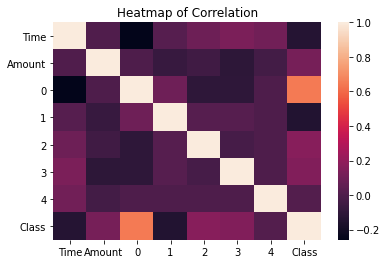

In [100]:
sns.heatmap(data = pd.concat([x_train_final,y_train], axis = 1).corr())
plt.title("Heatmap of Correlation")

Training using logistic regression classifier.

In [101]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter = 150)
logisticRegr.fit(x_train_final, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Our classifier has 91% validation accuracy.

In [102]:
score = logisticRegr.score(x_test_final, y_test)
print(score)

0.9137055837563451


In [0]:
pred = logisticRegr.predict(x_test_final)


Confusion Matrix:

Text(0.5, 1.0, 'Confusion Matrix Logistic Regression')

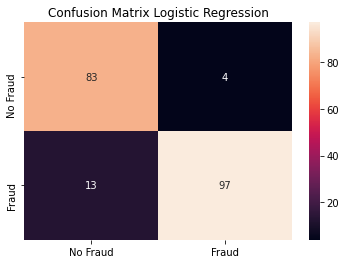

In [113]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,pred)
cm = pd.DataFrame(cm, index = ["No Fraud", "Fraud"], columns=["No Fraud", "Fraud"])
sns.heatmap(cm, annot = True)
plt.title("Confusion Matrix Logistic Regression")

In [111]:
clf = RandomForestClassifier()
clf.fit(x_train_final, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
scorerf = clf.score(x_test_final, y_test)
print(scorerf)

0.934010152284264


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier')

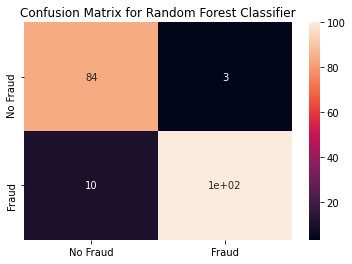

In [117]:
from sklearn import metrics
pred = clf.predict(x_test_final)
cm=metrics.confusion_matrix(y_test,pred)
cm = pd.DataFrame(cm, index = ["No Fraud", "Fraud"], columns=["No Fraud", "Fraud"])
sns.heatmap(cm, annot = True)
plt.title("Confusion Matrix for Random Forest Classifier")

Saving our classifier:

In [0]:
import pickle
save_classifier = open("LogisticRegressionClassfier.p","wb")
pickle.dump(logisticRegr, save_classifier)
save_classifier.close()
save_classifier = open("RandomForestClassfier.p","wb")
pickle.dump(clf, save_classifier)
save_classifier.close()
save_svd = open("SVDreduce.p","wb")
pickle.dump(svd, save_svd)
save_svd.close()